In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this project, an Image caption generator is developed using CNN and RNN Deep learning models to interpret the dataset

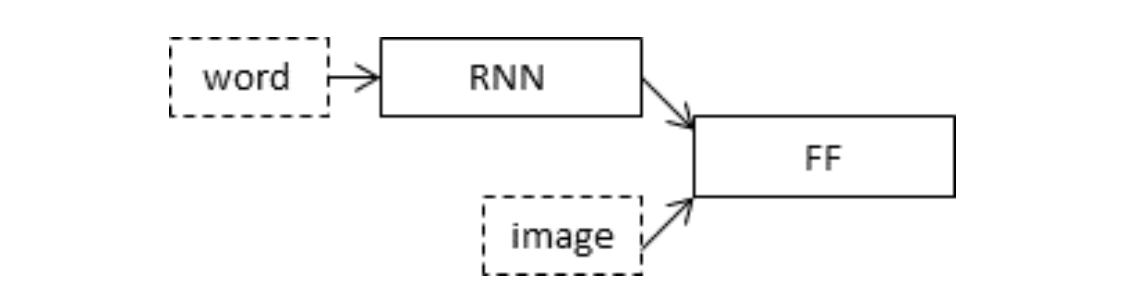

In [ ]:
import os
os.chdir('/content/drive/My Drive/TDS_ProjectFinal/Captioning')

This project requires the usage of a Convolutional Neural Network to understand the image features and identify the objects and also the usage of a recurrent neural network (RNN) to generate the caption by sequencing the words in the right order.
Since this is a supervised training method, we need a large dataset to train our model. Our dataset must contain both images as well as their captions. I chosse the Flickr8k dataset for this purpose since it contains a set of 5 captions for each image and hence we have plenty of vocabulary to generate new captions. Also since there are about 8000 images, object recognition alos becomes easy.The flickr8k datasets are also open-source and readily available. We sourced our dataset from https://forms.illinois.edu/sec/1713398 .

# PREPARATION OF PHOTO DATA

We have a dataset of nearly 8000 images. We have to process this dataset such that it can be sent as a set of features to the deep learning model. Since we have a large set of objects to categorise, we shall use the VGG model that won the imagenet competition. Since the VGG model has been trained on the imagenet dataset , and achieved a 92.7% accuracy, we may be confident that it is an optimal choice for training the image recognition model. The VGG net has requires the input image to be fed in the shape 224 x 224 x 3. The architecture of the VGG model is as follows
![image.png](data:https://drive.google.com/file/d/13CVfqpCoco4lJ13PoYafNkZW4vfJYdwp/view?usp=sharing)

Picture credit: https://neurohive.io/en/popular-networks/vgg16/


Our dataset has 6000:1000:1000 predefined training-set:dev_set:test_set of images.The benchark against whhich we will be evaluating our model is the BLEU benchmark. The BLEU stands for Bilingual Evaluation Study Underscore. The Natural Language Toolkit Library provides an implementation of the BLEU Score.The reference sentences are to be provided as a list of sentences in the form of tokens. The score range is from 0-1, 1 being a good score and 0 being bad.

<h3> Transfer Learning Technique

Instead of running our images through the entire architecture, we shall download the model weights and feed them to the model as an interpretation of the photo in the dataset. Keras provides us with VGG class which enables us to do just the same.

Let us create a function to extract the features. We load each photo and extract features from the VGG16 model as a 1x4096 vector.
The function will return a dictionary of image identifying tags(Image names on the flickr8k dataset), and the corresponding feature vectors.
![image](https://drive.google.com/file/d/13CVfqpCoco4lJ13PoYafNkZW4vfJYdwp/view?usp=sharing)
Picture credit: https://neurohive.io/en/popular-networks/vgg16/

In [ ]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import ModelCheckpoint
from keras.models import Model

# extract features from each photo in the directory
def extract_features(directory):
	"""
	This function runs through all the images in the Flickr8 dataset and extracts out the image names
	which correspond to the image id for this project. Further the image is also passed through the VGG 
	model obtained via transfer learning to get the features extracted out.

	Returns: a dictionary with the image_id as key and the features from VGG as value.
	"""

	# load the model and freeze all layers and weights until last two (transfer-learning step)
	model = VGG16()
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	print(model.summary())
 
	# Feature extraction using VGG network
	features = dict()
	for name in listdir(directory):
		
		#File processing
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		image = img_to_array(image)
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		image = preprocess_input(image)
	
	  # Creating model checkpoints and save it.
		filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
		checkpoint = ModelCheckpoint(filepath, verbose=1)
		callbacks_list = [checkpoint]

		# Fit the model
	  # model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)
		# get features
		feature = model.predict(image, verbose=0,callbacks=callbacks_list)
	
		# Obtaining image id
		image_id = name.split('.')[0]
		features[image_id] = feature
		print('>%s' % name)
	
	return features

# Driving code to run through all images and obtain the features from them.
directory = '/content/drive/My Drive/TDS_ProjectFinal/Captioning/Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# # save to file
# dump(features, open('/content/drive/My Drive/TDS_ProjectFinal/Captioning/features.pkl', 'wb'))

Streaming output truncated to the last 5000 lines.
>3142055158_01b9e4caa4.jpg
>3138746531_f6b816c126.jpg
>3139118874_599b30b116.jpg
>3138399980_d6ab8b2272.jpg
>3138433655_ea1d59e5b7.jpg
>3138504165_c7ae396294.jpg
>3141440149_00becbbb93.jpg
>3137061312_eb5fdcf3fd.jpg
>3141613533_595723208d.jpg
>3136688093_568b053bdf.jpg
>3139160252_75109e9e05.jpg
>3139895886_5a6d495b13.jpg
>3139393607_f0a54ca46d.jpg
>3139238055_2817a0c7d8.jpg
>3139837262_fe5ee7ccd9.jpg
>3139876823_859c7d7c23.jpg
>3143953179_1c08c023a5.jpg
>3145869775_85dfae43bd.jpg
>3143155555_32b6d24f34.jpg
>3143982558_9e2d44c155.jpg
>3145967019_1a83ebf712.jpg
>3144705706_391d7b77c7.jpg
>314685044_da4390728e.jpg
>3143978284_ac086be9a3.jpg
>3146232740_df3da0163b.jpg
>3143574389_8a4048fbe2.jpg
>3147217787_ed21cd4990.jpg
>3147758035_e8a70818cb.jpg
>3143980056_7a64a94b58.jpg
>3143991972_7193381aeb.jpg
>3146630574_05d9ebbed1.jpg
>314603661_51e05e0e24.jpg
>3143159297_6f2f663ea6.jpg
>3143765063_a7761b16d3.jpg
>3146355833_1b7fc80210.jpg
>31469

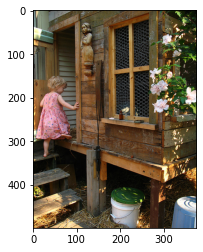

In [ ]:
# The following is to verify if the feature and the image id are stored correctly in the dictionary.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/content/drive/My Drive/TDS_ProjectFinal/Captioning/Flicker8k_Dataset/1000268201_693b08cb0e.jpg'))

# Features corresponding to the above image
print('The above image as stored in the feature dict with its features: \n', str(features["1000268201_693b08cb0e"]))

[[2.507647 0.       0.       ... 0.       0.       0.      ]]


#Preparation of text data
Cleaning and loading text data for the RNN is a crucial step. In general to prepare text for machine learning applications, we do the following.
* Loading the text document
<h4>Tokenization</h4>
* separate token Id and Image descriptions word by word and put them into two separate variables
* Remove the file extension from the image ID
* Now concatenate all the word of a single caption into a string again
* for every image ID store all 5 captions.
* Return as a dictionary consisting of lists of image IDs mapped to their corresponding captions
<h4> Vocabulary</h4>
In order to have a vocabulary of words, 
* We convert all the words to Lower case
*Remove all the punctuation
* remove ''s' and 'a'
*Remove all word with numbers in them
* Returned the cleaned words as a set named so that we have unique items in our vocabulary list which was extracted from the annotations document.
* Then we make a dictionary of image identifiers and descriptions to a new file and save the mappings to a file.

In [ ]:
import string
from tqdm import tqdm

def load_doc(filename):
	"""
	The function obtais a file as input and reads the data from the file and returns the read info.

	Returns: The read text from the file
	"""

	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text

def load_descriptions(doc):
	"""
	The function reads the various descriptions from the doc and concatenates all descriptions pertaining to
	an image into a single file with no spaces.

	Returns: Dict(list) containing the key: image_id and value: the descriptions with no spaces.
	"""

	mapping = dict()
	
	for line in doc.split('\n'):
	
		tokens = line.split()
		if len(line) < 2:
			continue
	
	  # Obtains the image_id and image_descripton from the file for every image.
		image_id, image_desc = tokens[0], tokens[1:]
		image_id = image_id.split('.')[0]

		# Concatenating all words as a single string in the descriptions.
		image_desc = ' '.join(image_desc)
	
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
	 
		mapping[image_id].append(image_desc)
	
	return mapping

def clean_descriptions(descriptions):
	"""
	The following function cleans up the text withing the descriptions by:
	* Removing punctuations
	* changing case to lower
	* removing the 's and the artcle a
	* remove the words with numeric digits in them.
	"""

	table = str.maketrans('', '', string.punctuation)
 
  # Extracts every object in the text dict and processes the descriptions to remove any unwanted characters.
	for key, desc_list in descriptions.items():

		# Iterates over every charcater in the list.
		for i in range(len(desc_list)):

			# Processes all the text according to the needs.
			desc = desc_list[i]
			desc = desc.split()
			desc = [word.lower() for word in desc]
			desc = [w.translate(table) for w in desc]
			desc = [word for word in desc if len(word)>1]
			desc = [word for word in desc if word.isalpha()]
			desc_list[i] =  ' '.join(desc)


def to_vocabulary(descriptions):
	"""
	The following function converts all text into vocabulary required by the RNN.
	"""

	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc


def save_descriptions(descriptions, filename):
	"""
	This function saves the cleaned up version of the text for each image into a new file.
	"""

	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()


# Driving code to do text preprocessing

filename = '/content/drive/My Drive/TDS_ProjectFinal/Captioning/Flickr8k_text/Flickr8k.token.txt'

doc = load_doc(filename)
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
clean_descriptions(descriptions)
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
save_descriptions(descriptions, '/content/drive/My Drive/TDS_ProjectFinal/Captioning/descriptions.txt')

Loaded: 8092 
Vocabulary Size: 8763


In [ ]:
# The following is a check to the correctness of text processing
print(descriptions["1000268201_693b08cb0e"])

['child in pink dress is climbing up set of stairs in an entry way', 'girl going into wooden building', 'little girl climbing into wooden playhouse', 'little girl climbing the stairs to her playhouse', 'little girl in pink dress going into wooden cabin']


# Making the Deep Learning Model
We will now be developing a deep learning model!

Here we have two files:
* Flickr_8k.trainImages.txt 
* Flickr_8k.devImages.txt

From these files we will be extracting our image ids and descriptions

**Our caption should be generated one word at a time, and hence we have a first word and a last word to identify the start and finish of the sentences.**

----

Here we will be using two main functions: 
* **load_set()**:- Helps with getting the image ids.
* **load_clean_descriptions()**:- Obtains the cleaned and encoded version of text data we need for captioning the images.

----

For the RNN and any NLP taks, we usually have to associate the tokens with a probability value. This is achieved here using the Keras tokenizer function.

In [ ]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint


def load_doc(filename):
	"""
	The function obtais a file as input and reads the data from the file and returns the read info.

	Returns: The read text from the file
	"""
	file = open(filename, 'r')
	text = file.read()
	file.close()
 
	return text

def load_set(filename):
	"""
	This loads a predefined set of images and their corresponding captions and processes them.
	"""

	doc = load_doc(filename)
	dataset = list()

	for line in doc.split('\n'):

		if len(line) < 1:
			continue

		identifier = line.split('.')[0]
		dataset.append(identifier)
	
	return set(dataset)
 
def load_clean_descriptions(filename, dataset):
	"""
	This function cleans the caption text into the necessary format and adds the start and end sequence string to it 
	to identify the start and end of each caption.

	Returns: The cleaned captions as a dict.
	"""

	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):

		tokens = line.split()
		image_id, image_desc = tokens[0], tokens[1:]

		# skip images not in the set
		if image_id in dataset:
			if image_id not in descriptions:
				descriptions[image_id] = list()
		
			# adds start and end string descriptors.
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
		
			descriptions[image_id].append(desc)
	 
	return descriptions


def load_photo_features(filename, dataset):
	"""
	Loads the features corresponding to the images mentioned in the predefined file.
	Returns the features of these images.
	"""

	
	all_features = load(open(filename, 'rb'))
	features = {k: all_features[k] for k in dataset}

	return features


def to_lines(descriptions):
	"""
	Covert a dictionary of clean descriptions to a list of descriptions.
	"""

	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]

	return all_desc


def create_tokenizer(descriptions):
	"""
	Tokenize the captions.
	"""

	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
 
	return tokenizer


def max_length(descriptions):
	"""
	Calculate the length of the description with the most words
	"""

	lines = to_lines(descriptions)
 
	return max(len(d.split()) for d in lines)


def create_sequences(tokenizer, max_length, desc_list, photo, vocab_size):
	"""
	Create sequences of images, input sequences and output words for an image
	"""

	X1, X2, y = list(), list(), list()
 
	# walk through each description for the image
	for desc in desc_list:
		# encode the sequence
		seq = tokenizer.texts_to_sequences([desc])[0]
		# split one sequence into multiple X,y pairs
		for i in range(1, len(seq)):
			# split into input and output pair
			in_seq, out_seq = seq[:i], seq[i]
			# pad input sequence
			in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
			# encode output sequence
			out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
			# store
			X1.append(photo)
			X2.append(in_seq)
			y.append(out_seq)
	 
	return array(X1), array(X2), array(y)


def define_model(vocab_size, max_length):
	"""
	Define the captioning model
	"""

	# Adding the input layer shape to the newly transfer learned VGG model and adding the last two layers.
	inputs1 = Input(shape=(4096,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
 
	# The part of the model that works with the text in the captions for the image.
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
 
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
 
	# Combining the image and word models
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
 
	# summarize model
	model.summary()
	plot_model(model, to_file='/content/drive/My Drive/TDS_ProjectFinal/Captioning/model.png', show_shapes=True)
 
	return model


def data_generator(descriptions, photos, tokenizer, max_length, vocab_size):
	"""
	Data generator, intended to be used in a call to model.fit_generator()
	"""

	# loop for ever over images
	while 1:
		for key, desc_list in descriptions.items():
			# retrieve the photo feature
			photo = photos[key][0]
			in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo, vocab_size)
			yield ([in_img, in_seq], out_word)
      

# Training: 6K images as training data.
filename = '/content/drive/My Drive/TDS_ProjectFinal/Captioning/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

# Description processing for the training data.
train_descriptions = load_clean_descriptions('/content/drive/My Drive/TDS_ProjectFinal/Captioning/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

# Feature extractiong from the training data.
train_features = load_photo_features('/content/drive/My Drive/TDS_ProjectFinal/Captioning/features.pkl', train)
print('Photos: train=%d' % len(train_features))

# Tokenizing the text data.
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size)
inputs, outputs = next(generator)
print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)


# define the model
model = define_model(vocab_size, max_length)
# train the model, run epochs manually and save after each epoch
epochs = 20
steps = len(train_descriptions)
for i in range(epochs):
	# create the data generator
	generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size)
	# fit for one epoch
	model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
	# save model
	model.save('/content/drive/My Drive/TDS_ProjectFinal/Captioning/'+ 'model_' + str(i) + '.h5')

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34
(47, 4096)
(47, 34)
(47, 7579)
Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 34, 256)      1940224     input_10[0][0]                   
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 4096)        

#TESTING


In [3]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

def load_doc(filename):
	"""
	The function obtais a file as input and reads the data from the file and returns the read info.

	Returns: The read text from the file
	"""

	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text

def load_set(filename):
	"""
	This loads a predefined set of images and their corresponding captions and processes them.
	"""

	doc = load_doc(filename)
	dataset = list()

	for line in doc.split('\n'):

		if len(line) < 1:
			continue

		identifier = line.split('.')[0]
		dataset.append(identifier)
	
	return set(dataset)


def load_clean_descriptions(filename, dataset):
	"""
	This function cleans the caption text into the necessary format and adds the start and end sequence string to it 
	to identify the start and end of each caption.

	Returns: The cleaned captions as a dict.
	"""

	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):

		tokens = line.split()
		image_id, image_desc = tokens[0], tokens[1:]

		# skip images not in the set
		if image_id in dataset:
			if image_id not in descriptions:
				descriptions[image_id] = list()
		
			# adds start and end string descriptors.
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
		
			descriptions[image_id].append(desc)
	 
	return descriptions

def load_photo_features(filename, dataset):
	"""
	Loads the features corresponding to the images mentioned in the predefined file.
	Returns the features of these images.
	"""

	
	all_features = load(open(filename, 'rb'))
	features = {k: all_features[k] for k in dataset}

	return features

def to_lines(descriptions):
	"""
	Covert a dictionary of clean descriptions to a list of descriptions.
	"""

	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]

	return all_desc

def create_tokenizer(descriptions):
	"""
	Tokenize the captions.
	"""

	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
 
	return tokenizer

def max_length(descriptions):
	"""
	Calculate the length of the description with the most words
	"""

	lines = to_lines(descriptions)
 
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# prepare tokenizer on train set

# load training dataset (6K)
filename = '/content/drive/MyDrive/Ajay_DataScience/Captioning/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('/content/drive/MyDrive/Ajay_DataScience/Captioning/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# prepare test set

# load test set
filename = '/content/drive/MyDrive/Ajay_DataScience/Captioning/Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('/content/drive/MyDrive/Ajay_DataScience/Captioning/descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('/content/drive/MyDrive/Ajay_DataScience/Captioning/features.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = '/content/drive/MyDrive/Ajay_DataScience/Captioning/model_10.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.526899
BLEU-2: 0.281747
BLEU-3: 0.184408
BLEU-4: 0.078884


In [4]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

def load_doc(filename):
	"""
	The function obtais a file as input and reads the data from the file and returns the read info.

	Returns: The read text from the file
	"""

	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text

def load_set(filename):
	"""
	This loads a predefined set of images and their corresponding captions and processes them.
	"""

	doc = load_doc(filename)
	dataset = list()

	for line in doc.split('\n'):

		if len(line) < 1:
			continue

		identifier = line.split('.')[0]
		dataset.append(identifier)
	
	return set(dataset)

def load_clean_descriptions(filename, dataset):
	"""
	This function cleans the caption text into the necessary format and adds the start and end sequence string to it 
	to identify the start and end of each caption.

	Returns: The cleaned captions as a dict.
	"""

	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):

		tokens = line.split()
		image_id, image_desc = tokens[0], tokens[1:]

		# skip images not in the set
		if image_id in dataset:
			if image_id not in descriptions:
				descriptions[image_id] = list()
		
			# adds start and end string descriptors.
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
		
			descriptions[image_id].append(desc)
	 
	return descriptions

def to_lines(descriptions):
	"""
	Covert a dictionary of clean descriptions to a list of descriptions.
	"""

	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]

	return all_desc

def create_tokenizer(descriptions):
	"""
	Tokenize the captions.
	"""

	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
 
	return tokenizer

# load training dataset (6K)
filename = '/content/drive/MyDrive/Ajay_DataScience/Captioning/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('/content/drive/MyDrive/Ajay_DataScience/Captioning/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('/content/drive/MyDrive/Ajay_DataScience/Captioning/tokenizer.pkl', 'wb'))

Dataset: 6000
Descriptions: train=6000


Web scraping:

So here, we have implemented web scraping approach that scrapes the web for a specific image category that we specify. So here we have given the image query as 'dog'. So it gets a dog image and runs the model's testing on that. thus we will be able to see how accurate it is for the image it has scraped off the web.


In [1]:
from bs4 import BeautifulSoup
import requests
import re
# !pip install http.cookiejar
import urllib3
import urllib
import os
from pathlib import Path
import json
import cv2
from google.colab.patches import cv2_imshow
urllib3.disable_warnings()

def get_soup(url,header):
    return BeautifulSoup(requests.get(url).content)
    #return BeautifulSoup(urllib3.urlopen(urllib3.Request(url,headers=header)),'html.parser')

def scrape(query):
  image_type="Action"
  query= query.split()
  query='+'.join(query)
  url="https://www.google.co.in/search?q="+query+"&source=lnms&tbm=isch"
  #add the directory for your image here
  BASE_DIR="/content/drive/My Drive/Pictures"
  DIR = os.path.join(BASE_DIR, query)
  Path(DIR).mkdir(parents=True, exist_ok=True)
  max_images = 2

  ActualImages=[]# contains the link for Large original images, type of  image
  soup = get_soup(url, '')
  for a in soup.find_all("img"):
    link = a.get("src") 
    Type = a.get("alt")
    ActualImages.append((link,Type))
  IMG = ""
  for i , (img , Type) in enumerate( ActualImages[1:max_images]):
      try:
          if len(Type)==0:
              IMG = os.path.join(DIR , "img" + "_"+ str(i)+".jpg")
              f = open(IMG, 'wb')
          else :
              IMG = os.path.join(DIR , "img" + "_"+ str(i)+"."+Type)
              f = open(IMG, 'wb')
          f.write(requests.get(img).content)
          f.close()
      except Exception as e:
          print ("could not load : "+img)
          print (e)
  print(IMG)
  scraped_img = cv2.imread(IMG)
  cv2_imshow(scraped_img)
  return IMG

In [2]:
def audi_op(description):
  import time
  from gtts import gTTS
  from tempfile import TemporaryFile
  from IPython.display import Audio

  disc = ' '.join(description.split(' ')[1:-1])
  print(disc)
  tts = gTTS(text=disc, lang='en')
  f = TemporaryFile()
  tts.write_to_fp(f)
  f.seek(0)
  x = Audio(f.read(), autoplay=True)
  return x

treehouse
/content/drive/My Drive/Pictures/treehouse/img_0.jpg


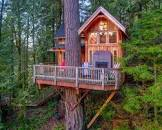

Description from web scraped image:  startseq man in red shirt is riding bike on dirt path endseq
man in red shirt is riding bike on dirt path


In [5]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = VGG16()
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('/content/drive/MyDrive/Ajay_DataScience/Captioning/tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('/content/drive/MyDrive/Ajay_DataScience/Captioning/model_10.h5')
# web scraped image
photo = extract_features(scrape(input()))
# photo = extract_features('https://streettrotter.com/wp-content/uploads/2016/05/Hippie-chic-bag-200x300.jpg')
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
print('Description from web scraped image: ', description)
audi_op(description)